# 1. Quick EDA

## A,Import Libraries and Load data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
prices = pd.read_csv('../data/BrentOilPrices.csv', parse_dates=['Date'])
events = pd.read_csv('../data/events.csv', parse_dates=['Date'])
print("Data Loaded Successfully")



C:\Users\dell\AppData\Local\Temp\ipykernel_15496\2998647359.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prices = pd.read_csv('../data/BrentOilPrices.csv', parse_dates=['Date'])


Data Loaded Successfully


## B,Basic Information form data

In [2]:
# Basic info
print(prices.info())
print(events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Event        12 non-null     object        
 1   Date         12 non-null     datetime64[ns]
 2   Description  12 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 420.0+ bytes
None


## C,Checking for Missing values and Duplicate values.

In [7]:
# 1. Check for missing values
print("Missing values per column:")
print(prices.isnull().sum())

# Or to get the total number of missing values in the entire DataFrame:
print("\nTotal missing values in the dataset:", prices.isnull().sum().sum())

# 2. Check for duplicate rows
print("\nNumber of duplicate rows:", prices.duplicated().sum())

# Optionally, to see the duplicate rows:
duplicates = prices[prices.duplicated()]
print("\nDuplicate rows:")
print(duplicates)

Missing values per column:
Date     0
Price    0
dtype: int64

Total missing values in the dataset: 0

Number of duplicate rows: 0

Duplicate rows:
Empty DataFrame
Columns: [Date, Price]
Index: []


 * There is No missing or Duplicate values so it is nice to continue ..

## D,Basic visualization

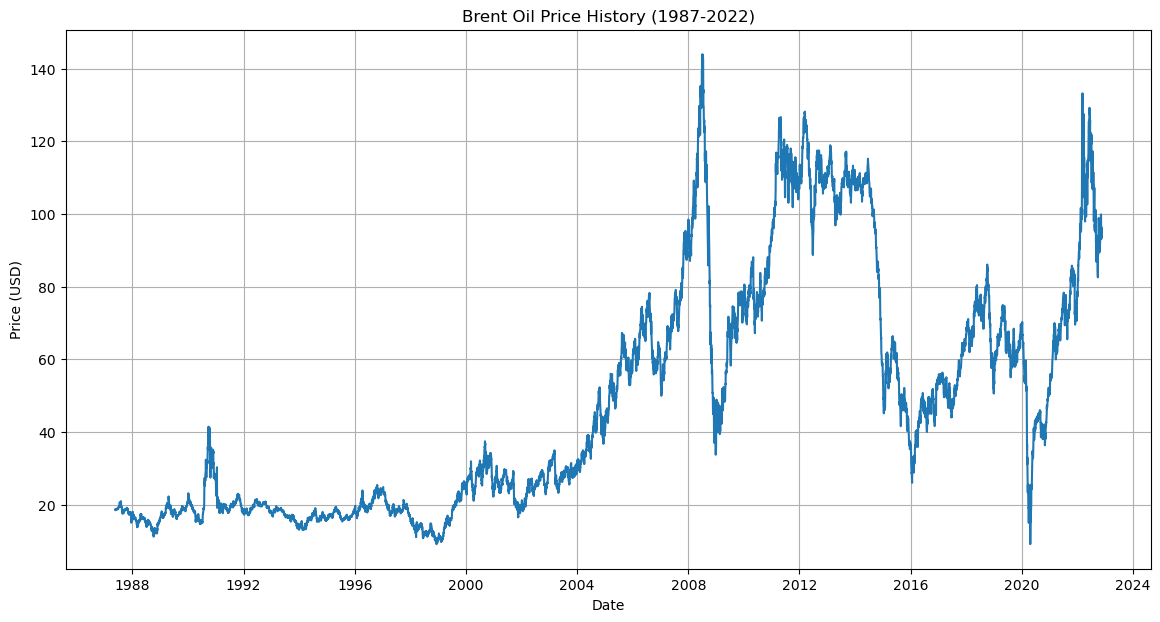

In [4]:
# Plot price history
plt.figure(figsize=(14, 7))
plt.plot(prices['Date'], prices['Price'])
plt.title('Brent Oil Price History (1987-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

### Plot price history with events.

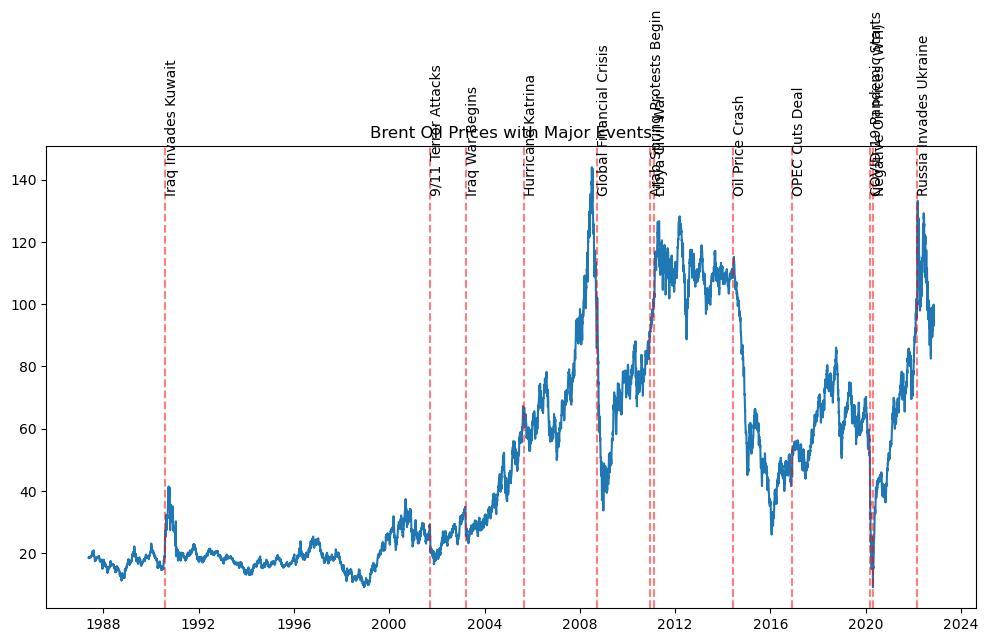

In [9]:

# Plot price history with events.
plt.figure(figsize=(12,6))
plt.plot(prices['Date'], prices['Price'])
for _, event in events.iterrows():
    plt.axvline(event['Date'], color='red', linestyle='--', alpha=0.5)
    plt.text(event['Date'], plt.ylim()[1]*0.9, event['Event'], rotation=90)
plt.title('Brent Oil Prices with Major Events')
plt.show()

# 2 . Log Returns Transformation

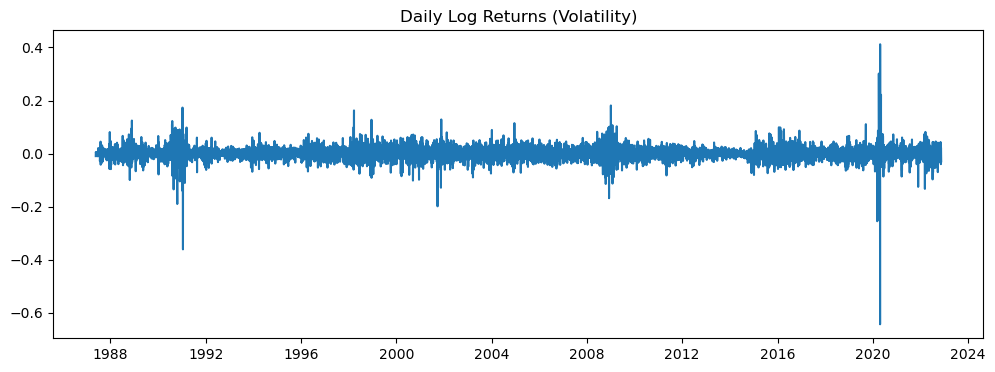

In [7]:
# Calculate daily log returns
prices['log_return'] = np.log(prices['Price']) - np.log(prices['Price'].shift(1))

# Plot volatility
plt.figure(figsize=(12,4))
plt.plot(prices['Date'], prices['log_return'])
plt.title('Daily Log Returns (Volatility)')
plt.show()

## # stationarity check with ADF test

In [9]:
# Check stationarity with ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(prices['Price'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -1.993856011392467
p-value: 0.2892735048934032
Critical Values:
	1%: -3.4310783342658615
	5%: -2.861861876398633
	10%: -2.566941329781918


In [10]:
# Log returns are more likely to be stationary
result = adfuller(prices['log_return'].dropna())
print(f'ADF Statistic for log returns: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic for log returns: -16.427113494485848
p-value: 2.4985801611432117e-29


* P-value is less than 0
* This means the log returns are stationary